In [1]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

## Загрузка и подготовка данных

### Обзор данных

In [2]:
try:
    data_reg_1 = pd.read_csv('/datasets/geo_data_0.csv')
    data_reg_2 = pd.read_csv('/datasets/geo_data_1.csv')
    data_reg_3 = pd.read_csv('/datasets/geo_data_2.csv')
except:
    data_reg_1 = pd.read_csv('geo_data_0.csv')
    data_reg_2 = pd.read_csv('geo_data_1.csv')
    data_reg_3 = pd.read_csv('geo_data_2.csv')

In [3]:
data = {}

data['Регион 1'] = data_reg_1
data['Регион 2'] = data_reg_2
data['Регион 3'] = data_reg_3

In [4]:
for key in data:
    print('\n', key, '\n')
    data[key].info()
    display(data[key].head())


 Регион 1 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


,id,f0,f1,f2,product
0,txEyH,0.705745,-0.497823,1.221170,105.280062
1,2acmU,1.334711,-0.340164,4.365080,73.037750
2,409Wp,1.022732,0.151990,1.419926,85.265647
3,iJLyR,-0.032172,0.139033,2.978566,168.620776
4,Xdl7t,1.988431,0.155413,4.751769,154.036647



 Регион 2 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


,id,f0,f1,f2,product
0,kBEdx,-15.001348,-8.276000,-0.005876,3.179103
1,62mP7,14.272088,-3.475083,0.999183,26.953261
2,vyE1P,6.263187,-5.948386,5.001160,134.766305
3,KcrkZ,-13.081196,-11.506057,4.999415,137.945408
4,AHL4O,12.702195,-8.147433,5.004363,134.766305



 Регион 3 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


,id,f0,f1,f2,product
0,fwXo0,-1.146987,0.963328,-0.828965,27.758673
1,WJtFt,0.262778,0.269839,-2.530187,56.069697
2,ovLUW,0.194587,0.289035,-5.586433,62.871910
3,q6cA6,2.236060,-0.553760,0.930038,114.572842
4,WPMUX,-0.515993,1.716266,5.899011,149.600746


Все типы данных и названия колонок определены правильно, по условию, нам важны три признака `f0`, `f1`, `f2`, а от колонки `id` можно избавится, но для начала проверим данные на простые дубликаты.

### Предобработка 

Приведем все ID к нижнему регистру для проверки.

In [5]:
for key in data:
    data[key]['id'] = data[key]['id'].str.lower()
    print(f'Всего дубликатов в {key}:', data[key].duplicated().sum())

Всего дубликатов в Регион 1: 0
Всего дубликатов в Регион 2: 0
Всего дубликатов в Регион 3: 0


В данных нет простых дубликатов. Предобработка не требуется.

### Изучение данных

Посмотрим на распределение признаков и их взаимную корреляцию.

In [6]:
for key in data:
    print(key)
    display(data[key].corr())

Регион 1


,f0,f1,f2,product
f0,1.000000,-0.440723,-0.003153,0.143536
f1,-0.440723,1.000000,0.001724,-0.192356
f2,-0.003153,0.001724,1.000000,0.483663
product,0.143536,-0.192356,0.483663,1.000000


Регион 2


,f0,f1,f2,product
f0,1.000000,0.182287,-0.001777,-0.030491
f1,0.182287,1.000000,-0.002595,-0.010155
f2,-0.001777,-0.002595,1.000000,0.999397
product,-0.030491,-0.010155,0.999397,1.000000


Регион 3


,f0,f1,f2,product
f0,1.000000,0.000528,-0.000448,-0.001987
f1,0.000528,1.000000,0.000779,-0.001012
f2,-0.000448,0.000779,1.000000,0.445871
product,-0.001987,-0.001012,0.445871,1.000000


Значительной корреляции между признаками не наблюдаестя (кроме `f2` и `product` в регионе 2)

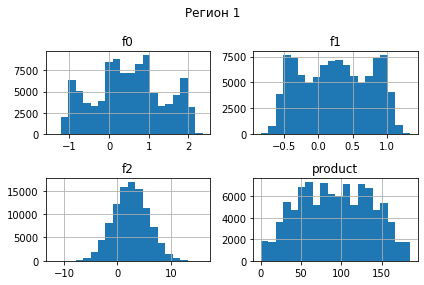

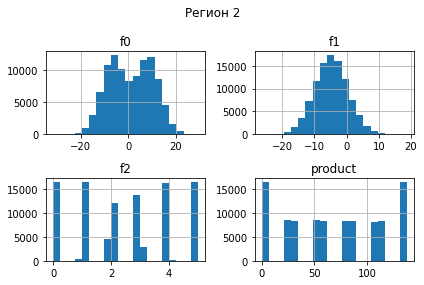

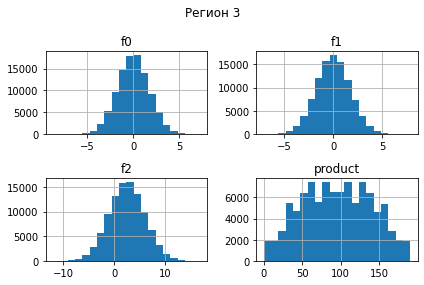

In [7]:
for key in data:
    figs, axs = plt.subplots(2, 2, constrained_layout=True)
    figs.suptitle(f'{key}', fontsize=12)
    data[key].hist(bins=20, figsize=(10, 8), ax=axs)
    plt.tight_layout()
    plt.show()

In [8]:
for key in data:
    print('\n', key)
    display(data[key].describe().T)


 Регион 1


,count,mean,std,min,25%,50%,75%,max
f0,100000.0,0.500419,0.871832,-1.408605,-0.072580,0.502360,1.073581,2.362331
f1,100000.0,0.250143,0.504433,-0.848218,-0.200881,0.250252,0.700646,1.343769
f2,100000.0,2.502647,3.248248,-12.088328,0.287748,2.515969,4.715088,16.003790
product,100000.0,92.500000,44.288691,0.000000,56.497507,91.849972,128.564089,185.364347



 Регион 2


,count,mean,std,min,25%,50%,75%,max
f0,100000.0,1.141296,8.965932,-31.609576,-6.298551,1.153055,8.621015,29.421755
f1,100000.0,-4.796579,5.119872,-26.358598,-8.267985,-4.813172,-1.332816,18.734063
f2,100000.0,2.494541,1.703572,-0.018144,1.000021,2.011479,3.999904,5.019721
product,100000.0,68.825000,45.944423,0.000000,26.953261,57.085625,107.813044,137.945408



 Регион 3


,count,mean,std,min,25%,50%,75%,max
f0,100000.0,0.002023,1.732045,-8.760004,-1.162288,0.009424,1.158535,7.238262
f1,100000.0,-0.002081,1.730417,-7.084020,-1.174820,-0.009482,1.163678,7.844801
f2,100000.0,2.495128,3.473445,-11.970335,0.130359,2.484236,4.858794,16.739402
product,100000.0,95.000000,44.749921,0.000000,59.450441,94.925613,130.595027,190.029838


Данные не масштабированные, необходимо исправить это при подготовке.

### Подготовка

От колонки `id` можно избавится, так как в ней вряд ли есть необходимая нам информация. Также необходимо разделить признаки на обучающие и целевые, разделить выборки на обучающую и валидационную, провести масштабирование количественных признаков.

#### Очистка данных

Вначале почистим данные.

In [9]:
for key in data:
    data[key] = data[key].drop(['id'], axis=1)

#### Разделение выборок

Теперь разделим признаки на обучающие и целевые. В нашем случае, целевой признак - запасы нефти в скважине `product`.

In [10]:
features = {}
target = {}

features_train = {}
features_valid = {}
target_train = {}
target_valid = {}

for key in data:
    features[key] = data[key].drop(['product'], axis=1)
    target[key] = data[key]['product']
    features_train[key], features_valid[key], target_train[key], target_valid[key] = train_test_split(
        features[key], target[key], test_size=0.25, random_state=7)
    features_train[key] = features_train[key].reset_index(drop=True)
    features_valid[key] = features_valid[key].reset_index(drop=True)
    target_train[key] = target_train[key].reset_index(drop=True)
    target_valid[key] = target_valid[key].reset_index(drop=True)

In [11]:
for key in features:
    print(f'{key}')
    print('Обучающая выборка: признаки', features_train[key].shape)
    print('Валидационная выборка: признаки', features_valid[key].shape)
    print('')
    print('Обучающая выборка: цель', target_train[key].shape)
    print('Валидационная выборка: цель', target_valid[key].shape)
    print('')

Регион 1
Обучающая выборка: признаки (75000, 3)
Валидационная выборка: признаки (25000, 3)

Обучающая выборка: цель (75000,)
Валидационная выборка: цель (25000,)

Регион 2
Обучающая выборка: признаки (75000, 3)
Валидационная выборка: признаки (25000, 3)

Обучающая выборка: цель (75000,)
Валидационная выборка: цель (25000,)

Регион 3
Обучающая выборка: признаки (75000, 3)
Валидационная выборка: признаки (25000, 3)

Обучающая выборка: цель (75000,)
Валидационная выборка: цель (25000,)



#### Масштабирование

Проведем масштабирование численных признаков

In [12]:
numeric_columns = ['f0', 'f1', 'f2']

In [13]:
for key in features:
    scaler = StandardScaler()
    scaler.fit(features_train[key][numeric_columns])
    
    features_train[key][numeric_columns] = scaler.transform(features_train[key][numeric_columns])
    features_valid[key][numeric_columns] = scaler.transform(features_valid[key][numeric_columns])

In [14]:
for key in features:
    print('\n', key)
    display(features_train[key].describe().T)


 Регион 1


,count,mean,std,min,25%,50%,75%,max
f0,75000.0,-1.052314e-16,1.000007,-2.190477,-0.655668,-0.000315,0.656121,2.110681
f1,75000.0,5.456968e-17,1.000007,-2.172589,-0.894598,-0.000283,0.894505,2.163132
f2,75000.0,6.818842e-17,1.000007,-4.487017,-0.683397,0.005767,0.683476,4.150236



 Регион 2


,count,mean,std,min,25%,50%,75%,max
f0,75000.0,-1.378453e-17,1.000007,-3.647548,-0.830663,0.000976,0.834382,3.145717
f1,75000.0,-1.230660e-16,1.000007,-4.213514,-0.677769,-0.004569,0.676204,4.595606
f2,75000.0,2.373213e-17,1.000007,-1.474667,-0.877255,-0.283751,0.883355,1.481878



 Регион 3


,count,mean,std,min,25%,50%,75%,max
f0,75000.0,-5.802766e-18,1.000007,-5.058747,-0.670875,0.003187,0.669080,4.172532
f1,75000.0,-2.993753e-17,1.000007,-4.087357,-0.678492,-0.005341,0.676618,4.534743
f2,75000.0,2.993753e-17,1.000007,-4.162670,-0.677446,-0.002774,0.679060,4.093727


### Вывод

 * Данные чистые, типы правильные, простых дубликатов и пропусков нет
 * Подготовили данные: избавились от колонки `id`, разделили на обучающую и валидационную выборки в соотношении 75:25, произвели масштабирование признаков.

## Обучение и проверка модели

По условию нам подходит только модель линейной регрессии, обучим ее и проверим на валидационной выборке. Правильные ответы и предсказания необходимо сохранить по условию задачи.

### Обучение моделей по регионам

In [15]:
pred = {}
rmse = []
pred_res = []

model = LinearRegression()
for key in features:
    model.fit(features_train[key], target_train[key])
    pred[key] = pd.Series(model.predict(features_valid[key]))
    rmse.append(mean_squared_error(target_valid[key], pred[key]) ** 0.5)
    pred_res.append(pred[key].mean())
    print(f'{key}')
    print('RMSE:', mean_squared_error(target_valid[key], pred[key]) ** 0.5)
    print('Mean oil reserves:', pred[key].mean(), '\n')

Регион 1
RMSE: 37.61698862149409
Mean oil reserves: 92.50122097236377 

Регион 2
RMSE: 0.8901574284390847
Mean oil reserves: 68.81713795297324 

Регион 3
RMSE: 39.92612735265435
Mean oil reserves: 94.82396409311703 



### Вывод

Наблюдаем достаточно интересную картину.

В первом и третьем регионах примерно одинаковые средние предсказанные запасы, но довольно высокая средняя квадратичная ошибка - почти 40% от предсказанных значений.

Во втором региона средние запасы меньше примерно на четверть, но RMSE всего около 1%, то есть, точность предсказаний во 2 регионе намного выше.

Интересно, что покажут нам расчеты прибыли.

## Подготовка к расчёту прибыли

Подготовимся к расчету прибыли: сохраним все ключевые значения для расчётов в отдельных переменных и рассчитаем достаточный объём сырья для безубыточной разработки новой скважины.

Затем сравним полученный объём сырья со средним запасом в каждом регионе.

Объявим функцию, с помощью которой будем считать прибыль по выбранным скважинам и предсказаниям модели.

### Определение среднего объема для безубыточной работы

Для расчетов нам нужны:
 - стартовый капитал на бурение скважин - `IN_CAP`
 - количество скважин, которые будут пробурены - `WELL_COUNT`
 - стоимость 1 единицы продукта, 1000 баррелей нефти - `OIL_PRICE`

In [16]:
IN_CAP = 10 * 10 ** 9
WELL_COUNT = 200
OIL_PRICE = 450_000

Теперь вычислим, при каком объеме извлекаемых запасов в скважине, она окупится.

In [17]:
zero_income_vol = IN_CAP / (WELL_COUNT * OIL_PRICE)

In [18]:
zero_income_vol

111.11111111111111

**Вывод:** для безубыточой работы необходимо, чтобы в среднем в каждой из 200 скважин было 111.(1) тыс. баррелей извлекаемых запасов. По прогнозу, ни в одном регионе среднее значение запасов не достигает этого значения. Но в регионах 10 000 скважин, нам достаточно, чтобы только 200 были такими, так что будем изучать прибыли.

### Функция для расчета прибыли

Объявим функцию для расчёта прибыли по выбранным скважинам и предсказаниям модели, которая:
 - Выберет скважины с максимальными значениями предсказаний. 
 - Просуммирует целевое значение объёма сырья, соответствующее этим предсказаниям.
 - Рассчитает прибыль для полученного объёма сырья.

In [73]:
def oil_income(predictions, targets, well_count, oil_price, in_cap):
    '''
    Функция считает прибыль от первых well_count предсказанных скважин. 
        predictions - датасет с предсказаниями
        targets - датасет с истиными параметрами
        well_count - количество скважин
        in_cap - начальный капитал: расходы на бурение скважин
    '''
    best_well = predictions[~predictions.index.duplicated(keep='first')]
    best_well = best_well.sort_values(ascending=False)[:well_count]
    oil_volume = targets[best_well.index][:well_count].values
    return pd.Series(oil_volume).sum() * oil_price - in_cap

## Расчёт прибыли и рисков 

По каждому региону необходимо применить технику Бутсреп с 1000 выборок чтобы найти распределение прибыли. По условию, размер выборки - 500 скважин.

Затем, оценим среднюю прибыль в регионе, найдем 95% доверительный интервал и посчитаем риск убытков (то есть, вероятность  отрицательной прибыли)

### Расчет прибыли техникой Bootstrap

In [64]:
state = np.random.RandomState(7)

In [75]:
%%time
bootstrap_samples = 1000

pred_income = {}
for key in pred:
    pred_income[key] = []
    for i in range(bootstrap_samples):
        pred_subsample = pred[key].sample(n=500, replace=True, random_state=state)
        target_subsample = target_valid[key][pred_subsample.index]
        pred_income[key].append(oil_income(pred_subsample, target_subsample, WELL_COUNT, OIL_PRICE, IN_CAP))
    pred_income[key] = pd.Series(pred_income[key])

CPU times: user 3.93 s, sys: 0 ns, total: 3.93 s
Wall time: 3.93 s


### Обзор средней прибыли и 95%-квантили

In [88]:
for key in pred_income:
    print(f'{key}')
    print('Средняя прибыль:', 
          pred_income[key].mean().round(-5), 
          '  95% квантиль:', 
          f'[{pred_income[key].quantile(0.025).round(-5)} - {pred_income[key].quantile(0.975).round(-5)}]',
          '  Вероятность убытков в %:',
          f'{(pred_income[key].lt(0).sum() / pred_income[key].ge(0).sum() * 100).round(2)}', 
          '\n')

Регион 1
Средняя прибыль: 438200000.0   95% квантиль: [-80200000.0 - 935600000.0]   Вероятность убытков в %: 5.04 

Регион 2
Средняя прибыль: 438700000.0   95% квантиль: [31000000.0 - 813800000.0]   Вероятность убытков в %: 1.63 

Регион 3
Средняя прибыль: 352200000.0   95% квантиль: [-155100000.0 - 863100000.0]   Вероятность убытков в %: 10.62 



| Регион      | Средняя прибыль млн. руб. | 95% квантиль, млн. руб. | Вероятность убытков, % |
| ----------- | ------------------------- | ------------------------| ---------------------- |
| Регион 1    | 438.2                     | -80.2 - 935.6           | 5.04                   |
| Регион 2    | 438.7                     | 31.0 - 813.8            | 1.63                   |
| Регион 3    | 352.2                     | -155.1 - 863.1          | 10.62                  |

### Вывод

Из вероятности убытко видно, что лишь 2 регион подходит под условия задачи - только в нем вероятность убытков ниже 2,5%.

Значит, стоит порекомендовать бурение новых скважин по 2 регионе, средняя прибыль на 1 скважину составит 438.7 млн. рублей.

## Вывод

Были изучены 3 разных региона с целью определить, где бурить новые скважины.

Данные оказались чистыми, без дубликатов и не требовали предобработки. Для дальнейшей работы, они были разделены на обучающую и валидационную выборки в соотношении 3:1 и отмасштабированы.

По условию задачи, на каждом регионе в отдельности была обучена модель линейной регрессии. По метрике `RMSE` наилучшая точность прогноза была достигнута в **регионе 2**.

Для расчета прибыли и рисков на каждом регионе была использована техника Bootstrap с 1000 выборок по 500 скважин. По условию задачи, на основе прогноза модели выбирались 200 лучших и по ним подсчитывалась реальная прибыль по известным данным.

Результаты применения техники сведены в таблице ниже:

| Регион      | Средняя прибыль млн. руб. | 95% квантиль, млн. руб. | Вероятность убытков, % |
| ----------- | ------------------------- | ------------------------| ---------------------- |
| Регион 1    | 438.2                     | -80.2 - 935.6           | 5.04                   |
| Регион 2    | 438.7                     | 31.0 - 813.8            | 1.63                   |
| Регион 3    | 352.2                     | -155.1 - 863.1          | 10.62                  |

С учетом поставленных условий (вероятность убытка <2,5% и максимальная средняя прибыль) для бурения новых скважин можно порекомендовать **Регион 2**.